# Step 1: 1-D Linear Convection

The basic model is a good building block to begin with.
 
$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0$$

The initial condition of $u(x, 0) = u_0(x)$ makes the exact solution of the equation $u(x, t) = u_0(x - ct)$

We need to discretize the equation in both space and time, so we use the *Forward Difference Scheme* for the time derivative and the *Backward Difference Scheme* for the space derivative. The spatial coordinate, *x*, is discretized into *N* points, where $x_i ; i = 0, N$. The time steps are discretized in $\Delta{t}$

$$\frac{\partial u}{\partial x} \approx \frac{u(x + \Delta{x}) - u(x)}{\Delta{x}}$$

The discrete equation then, is

$$u_i^{n+1} = u_i^n - c\frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)$$

Now, we implement.

In [184]:
# code start
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation
import time, sys

# this will make matplotlib appear in the notebook, not in a new window
%matplotlib inline

# experiment variables
num_x = 41 # number of discretized steps in the space-domain
len_x = 2 # length of space-domain
dx = len_x / (num_x-1) # size of each step in space domain
time_steps = 50 # amount of time steps
time_length = 0.5 # amount of time of simulation
dt = time_length / time_steps # change of time per step
c = 1 # wavespeed, c = 1
 


We also need to set up initial conditions. $u = 2$ in the interval $0.5 \leq x \leq 1$ and $u = 1$ everywhere else in (0, 2)

In [185]:
u = np.zeros([time_steps, num_x])
u[0, :] = np.ones([1, num_x])
u[0, int(0.5/dx):int(1/dx+1)] = 2

We want to observe the initial conditions graphically

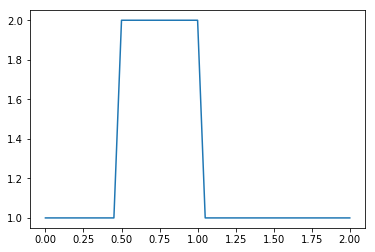

In [186]:
pyplot.plot(np.linspace(0, 2, num_x), u[0, :]);

Time to implement the convection equation. For every element in *u*, we need to perform $u_i^{n+1} = u_i^n - c\frac{\Delta t}{\Delta x}(u_i^n - u_{i-1}^n)$

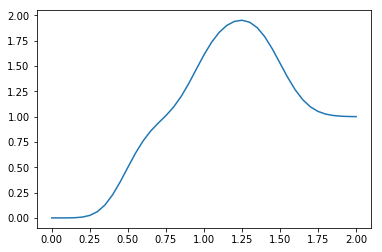

In [187]:
for i in range(1, time_steps): # iterating across the time steps
    for j in range(1, num_x):
        u[i, j] = u[i-1, j] - c*(dt/dx)*(u[i-1, j] - u[i-1, j-1])
        
plt.plot(numpy.linspace(0, 2, num_x), u[-1, :]);


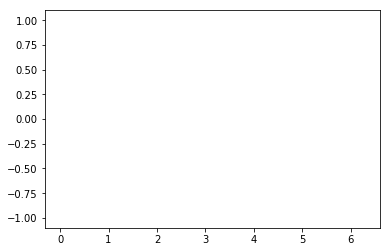